In [ ]:
%pip list

In [6]:
%pip install pyspark

  Using cached pyspark-4.0.0-py2.py3-none-any.whl
  Using cached py4j-0.10.9.9-py2.py3-none-any.whl.metadata (1.3 kB)
Using cached py4j-0.10.9.9-py2.py3-none-any.whl (203 kB)

   ---------------------------------------- 0/2 [py4j]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   -------------------- ------------------- 1/2 [pyspark]
   ------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Charger le fichier CSV avec parsing de la date
df = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", parse_dates=["CMPLNT_TO_DT"])



C:\Users\jomat\AppData\Local\Temp\ipykernel_5680\1741930944.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./ressources/NYPD_Complaint_Data_Current__Year_To_Date__20250718.csv", parse_dates=["CMPLNT_TO_DT"])


In [2]:
# 2. Vérifier le contenu
print(df.head())


  CMPLNT_NUM  ADDR_PCT_CD BORO_NM CMPLNT_FR_DT CMPLNT_FR_TM CMPLNT_TO_DT  \
0  306735347           47   BRONX   05/20/2025     16:00:00   2025-05-20   
1  309112063           47   BRONX   04/05/2025     02:10:00   2025-04-05   
2  305684451           44   BRONX   05/01/2025     14:20:00          NaT   
3  298927491           43   BRONX   01/04/2025     08:00:00          NaT   
4  308875141           47   BRONX   06/28/2025     13:00:00          NaT   

  CMPLNT_TO_TM CRM_ATPT_CPTD_CD HADEVELOPT  HOUSING_PSA  ...  \
0     16:30:00        COMPLETED     (null)          NaN  ...   
1     02:20:00        COMPLETED     (null)          NaN  ...   
2       (null)        COMPLETED     (null)          NaN  ...   
3       (null)        COMPLETED     (null)          NaN  ...   
4       (null)        COMPLETED     (null)          NaN  ...   

   TRANSIT_DISTRICT VIC_AGE_GROUP  VIC_RACE VIC_SEX X_COORD_CD Y_COORD_CD  \
0               NaN         25-44     BLACK       M          0          0   
1   

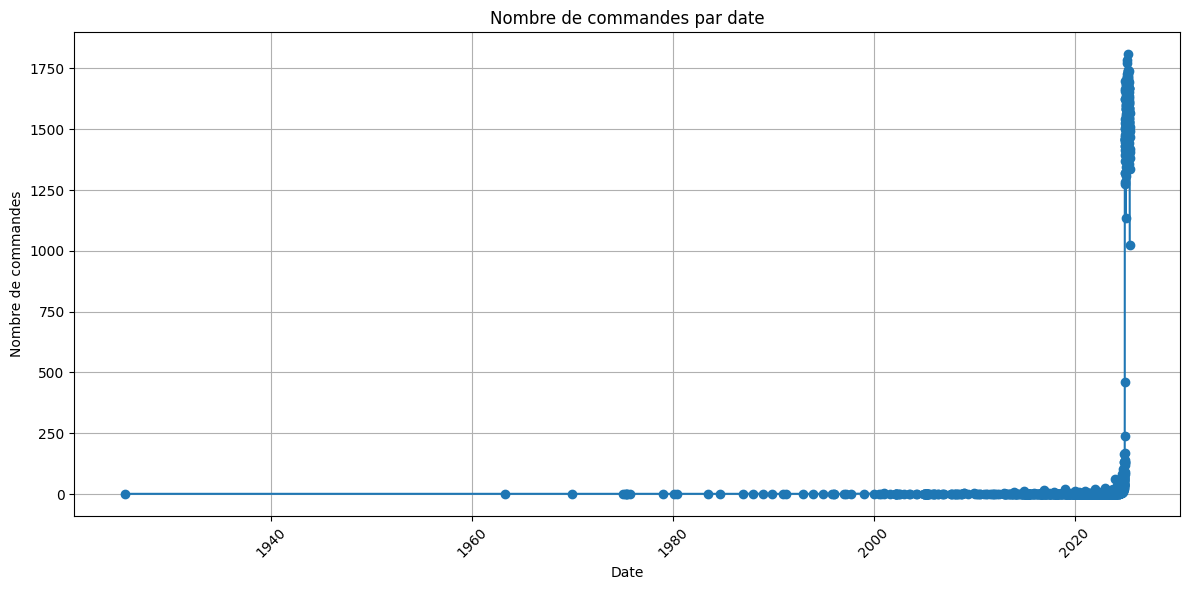

In [11]:
# Conversion avec gestion des erreurs
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors='coerce')

# Supprimer les lignes avec des dates invalides
df = df.dropna(subset=["CMPLNT_FR_DT"])

# Grouper, trier et tracer comme avant
df_grouped = df.groupby("CMPLNT_FR_DT").size().reset_index(name="BORO_NM")
df_grouped = df_grouped.sort_values("CMPLNT_FR_DT")

plt.figure(figsize=(12, 6))
plt.plot(df_grouped["CMPLNT_FR_DT"], df_grouped["BORO_NM"], marker='o')
plt.xlabel("Date")
plt.ylabel("Nombre de commandes")
plt.title("Nombre de commandes par date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


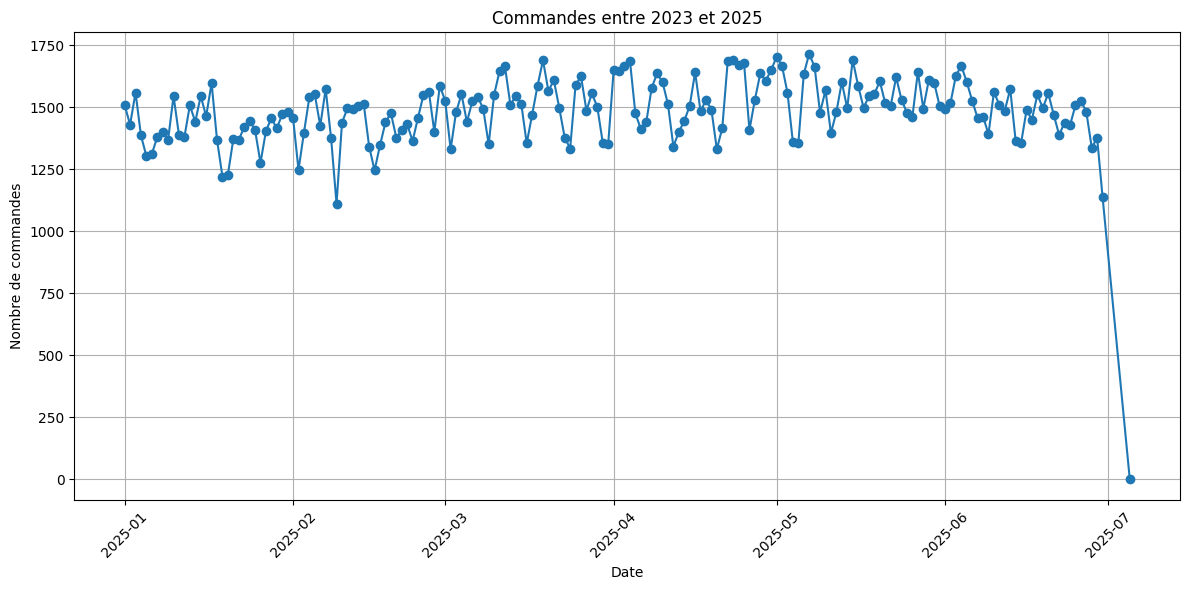

In [ ]:
debut = "2025-01-01"
fin = "2025-09-01"

# Assurez-vous que c'est bien une colonne datetime
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"], errors='coerce')

# Appliquer le filtre
df_filtré = df[(df["CMPLNT_FR_DT"] >= debut) & (df["CMPLNT_FR_DT"] <= fin)]

# Grouper et compter
df_grouped = df_filtré.groupby("CMPLNT_FR_DT").size().reset_index(name="BORO_NM")

# Trier (important pour le graphique)
df_grouped = df_grouped.sort_values("CMPLNT_FR_DT")

# Afficher le graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_grouped["CMPLNT_FR_DT"], df_grouped["BORO_NM"], marker='o')
plt.xlabel("Date")
plt.ylabel("Nombre de commandes")
plt.title("Commandes entre 2023 et 2025")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()